# Analysis summary 18 October 2023

***

In [1]:
from IPython.display import Image

***

### Volumetric TS

Originally presented by [Montgomery 1958 *Deep Sea Res.*](https://doi.org/10.1016/0146-6313(58)90004-2).

**1. Method**

Assign 3D model cells to specific TS bins and add the volumes over each bin.

   - My initial approach was to loop through TS bins and find the cell indices, which was very computationally expensive, especially at HR.
   - No improvement in `fortran`, some promising improvements using [`numba`](https://numba.pydata.org/), but still slow
   - This week I was able scale the analysis to HR using `matplotlib.pyplot.hist2d`, which uses matrix calculations under the hood. Also used by `MPAS-Analysis`.

**2. Status**

Still in development but results soon ...

**3. Example**

[Evans et al. 2023, *Ocean Sci.*](https://doi.org/10.5194/os-19-745-2023)

Comparison of three datasets north of OSNAP.

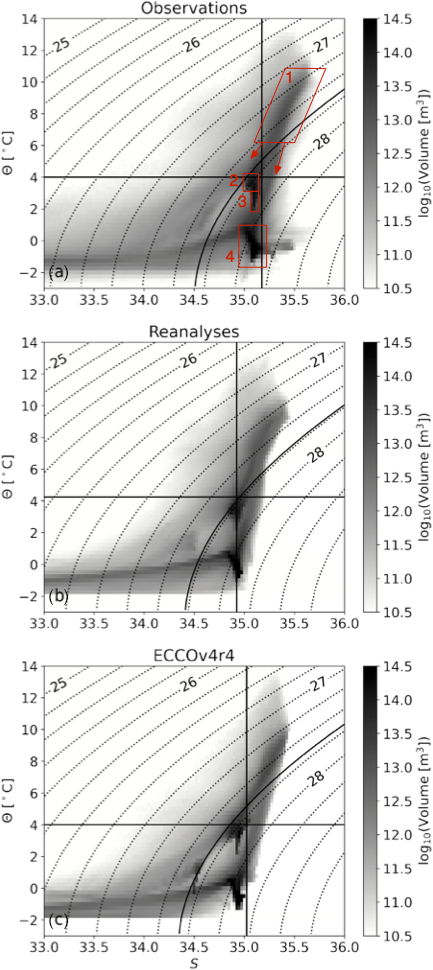

In [10]:
Image(filename='figures/Evans_etal2023_OS_f01.png', width=350)

Evans et al. extend this analysis to look at water mass transformation at TS bins as well.
   - Air/sea transformation (Walin) preconditions surface water to the overturning density (dashed contour)
   - Overturning transformation (integrated velocity over TS classes) delivers warm, salty water to subpolar NA
   - Residual tranformation is unconstrained, but accounts for freshening in the SPG

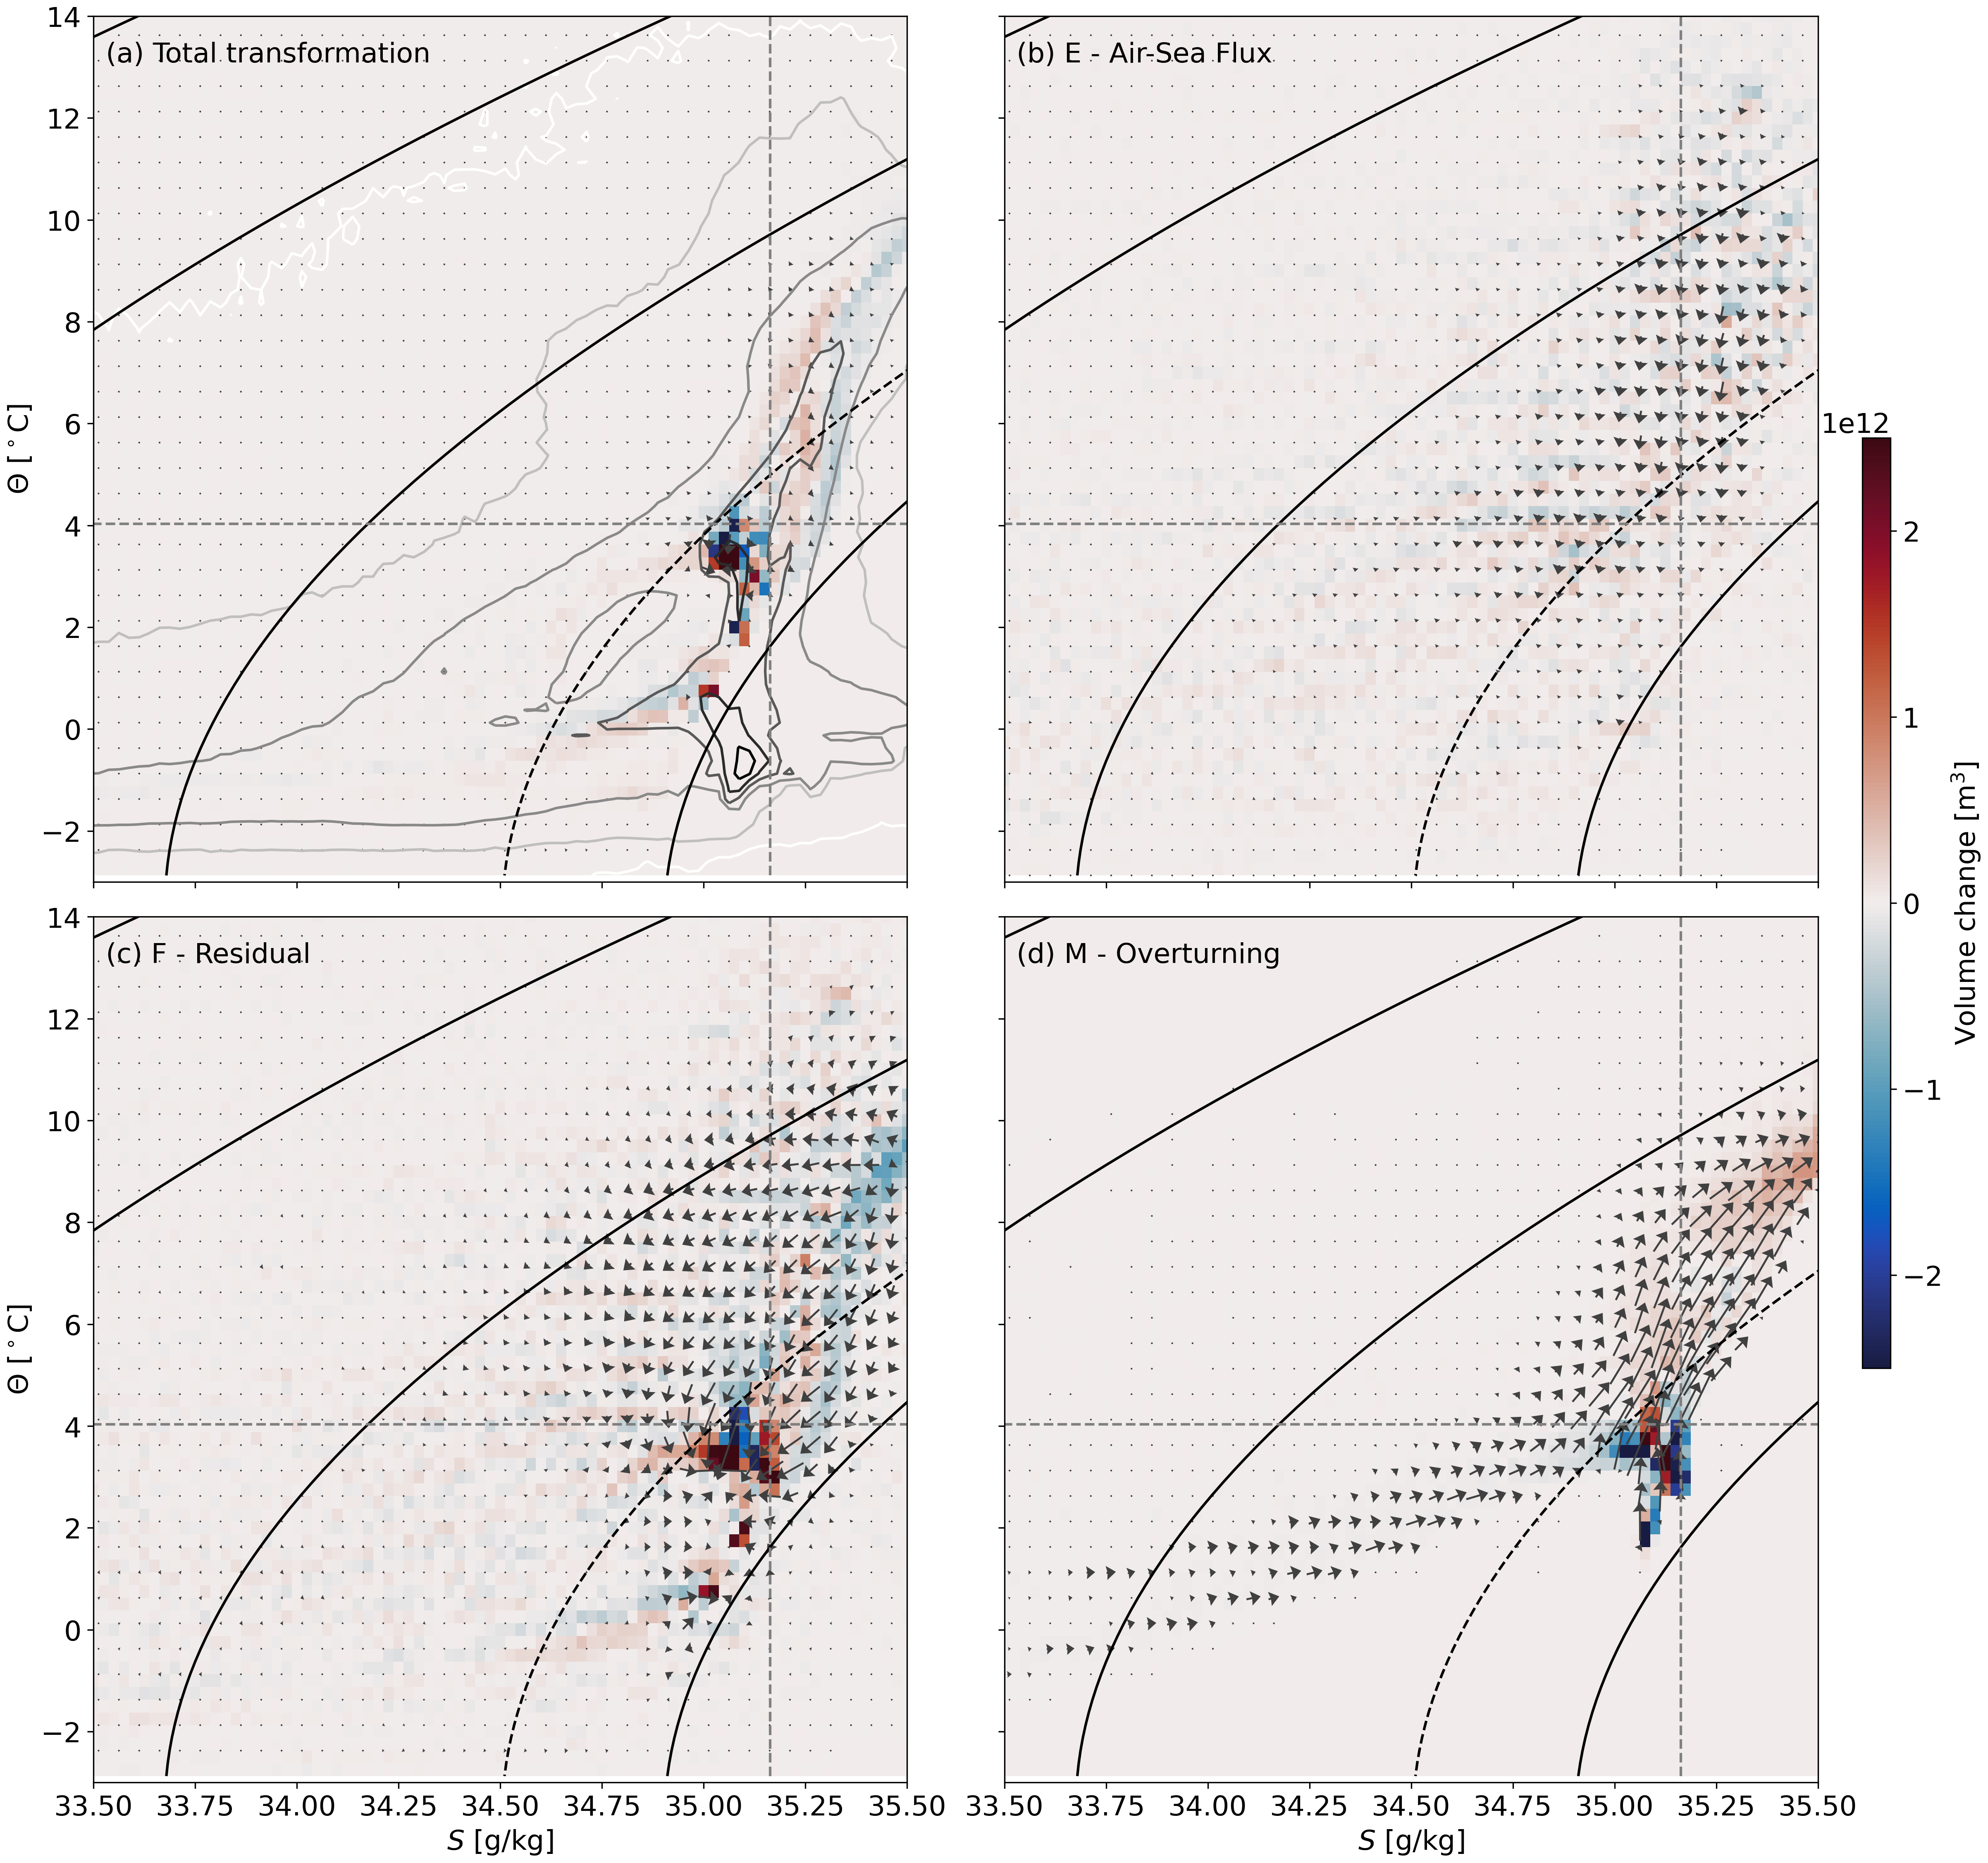

In [15]:
Image(filename='figures/Evans_etal2023_OS_f05.png', width=650)

**4. Contribution to paper**

My plan for volumetric TS saves the binned fields monthly for each of the North Atlantic basins.
   - Qualitative figure to compare meshes
   - Define watermasses by TS and track volume over time
   - Compare surface formation to subsurface volume by region
      - What fraction of subsurface volume comes from surface SPMW formation? In which region?
      - Are the regions different between LR and HR? (Shifted poleward at HR perhaps?)
      - What accounts for the remainder? Mixing/entrainment? Other sources?

***

### Water column PV

**1. Method**

Isopycnic PV (ignoring relative vorticity)

$$PV = \left|\frac{f}{\rho}\frac{\partial\rho}{\partial z}\right|$$

A PV minimum indicates vertical uniformity.

The contribution of relative vorticity in WBCs may be on the order of $f$, nevertheless this metric has wide usage in water mass analysis studies.

PV can be calculated directly from MPAS potential density or $N^2$. Will be less computationally expensive than volumetric TS because there are no bins to loop over.

**2. Status**

Still in development, 3D workflow is in place ...

**3. Example**

[Brambilla and Talley 2008 *JGR*](https://doi.org/10.1029/2006JC004062)

Comparing circulation to mode water presence in eastern SPG. Regions of minimum PV approximately follow streamlines at lower SPMW density, but deviate toward the East Reykjanes Ridge at higher density classes. Low connectivity of streamlines suggests alternate source of SPMW.

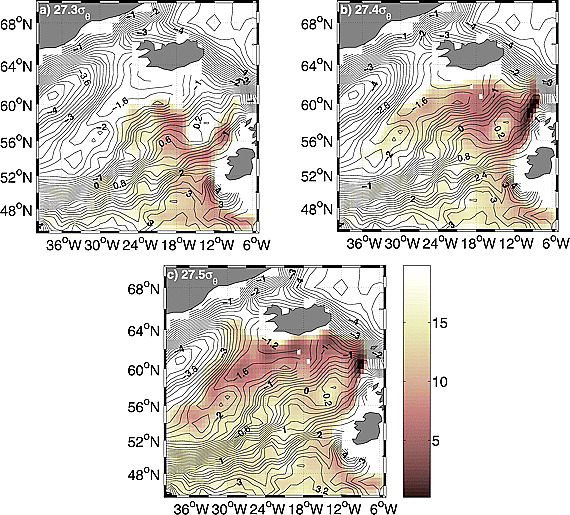

In [16]:
Image(filename='figures/Brambilla_Talley2008_JGR_f10.png', width=650)

Brambilla and Talley extend this analysis to look at PDFs in PV/streamfunction space to identify watermass regions, further demonstrating the lack of connectivity between the eastern and western SPG.

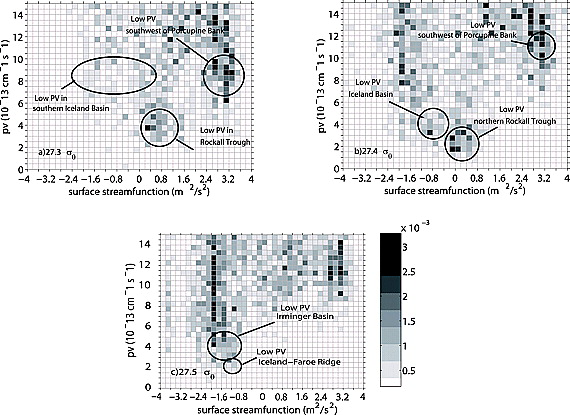

In [17]:
Image(filename='figures/Brambilla_Talley2008_JGR_f12.png', width=650)

**4. Contribution to paper**

Like volumetric TS, PV provides another method for tracking subsurface mode water.

***

### Meridional heat transport

**1. Method**

   - 3D fields of temperature, velocity, GM velocity (T $\times$ velocity if available)
   - Find on cell edges
   - Binned by latitude
   - More details to familiarize myself with in `f90` code

**2. Status**

Not yet in development
   - MPAS variables identified
   - Preliminary understanding of using variables on cell edges
   - 3D workflow in place

**3. Example**

[Danabasoglu et al. 2014 *Ocean Model.*](https://doi.org/10.1016/j.ocemod.2013.10.005)

CORE II mean states paper. Models with a stronger AMOC generally have higher NA MHT curves.

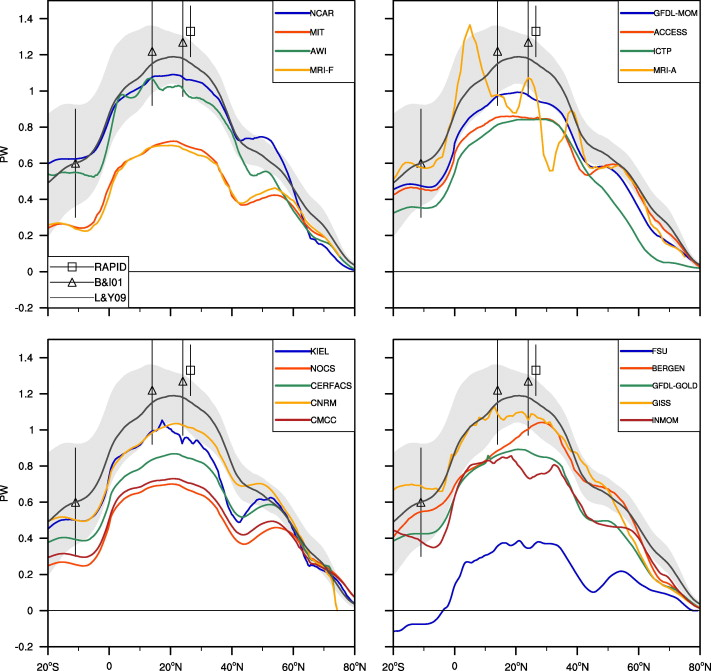

In [19]:
Image(filename='figures/Danabasoglu_etal2014_OceanModel_f06.jpg', width=700)

They go on to demonstrate this correlation at 26.5 degrees N.

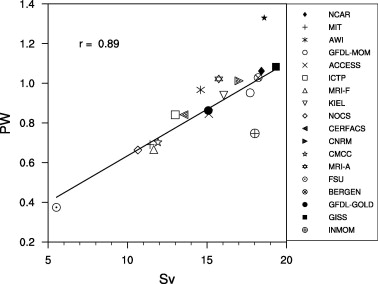

In [22]:
Image(filename='figures/Danabasoglu_etal2014_OceanModel_f07.jpg', width=500)

**4. Contribution to paper**

Since AMOC is transporting heat poleward where it is then lost to the atmosphere, MHT is a valuable metric for comparing this heat cycle between models, despite being a full water-column metric.
   - We already know the LR is cold-biased
   - Lower MHT at LR provides additional support that the bias is due to meridional advection
   - Possible decomposition to show eddy/GM components of MHT